In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
from sklearn.impute import SimpleImputer
import math

In [2]:
train = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')
test = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')
sessions = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')

In [3]:
sessions = sessions.drop(sessions[sessions.user_id.isnull()].index)

In [4]:
copy = sessions.action.value_counts()[108:].index.tolist().copy()
sessions.action = sessions.action.replace(copy,'action_rare')
copy = sessions.action_type.value_counts()[5:].index.tolist().copy()
sessions.action_type = sessions.action_type.replace(copy,'action_type_rare')
copy = sessions.action_detail.value_counts()[64:].index.tolist().copy()
sessions.action_detail = sessions.action_detail.replace(copy,'action_detail_rare')
copy = sessions.device_type.value_counts()[8:].index.tolist().copy()
sessions.device_type = sessions.device_type.replace(copy,'device_type_rare')

In [5]:
index = int(1)
maps = {}
for x in sessions.action.dropna().unique():
    maps[x] = index
    index += 1
sessions.action = sessions.action.map(maps)
index = int(1)
maps = {}
for x in sessions.action_type.dropna().unique():
    maps[x] = index
    index += 1
sessions.action_type = sessions.action_type.map(maps)
index = int(1)
maps = {}
for x in sessions.action_detail.dropna().unique():
    maps[x] = index
    index += 1
sessions.action_detail = sessions.action_detail.map(maps)
index = int(1)
maps = {}
for x in sessions.device_type.dropna().unique():
    maps[x] = index
    index += 1
sessions.device_type = sessions.device_type.map(maps)


In [6]:
print(sessions.isnull().sum())
print(len(sessions.index))
print(len(sessions.user_id.unique()))
print(len(sessions.device_type.unique()))
print(sessions.device_type.unique())
print(sessions.user_id)

user_id                0
action             79480
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed      135483
dtype: int64
10533241
135483
9
[1 2 3 4 5 6 7 8 9]
0           d1mm9tcy42
1           d1mm9tcy42
2           d1mm9tcy42
3           d1mm9tcy42
4           d1mm9tcy42
               ...    
10567732    9uqfg8txu3
10567733    9uqfg8txu3
10567734    9uqfg8txu3
10567735    9uqfg8txu3
10567736    9uqfg8txu3
Name: user_id, Length: 10533241, dtype: object


In [7]:
sessions = sessions.drop(sessions[sessions.action.isnull()].index)

In [8]:
sessions.action = sessions.action.apply(lambda a: math.floor(a))

In [ ]:
#print(sessions.isnull().sum())

In [ ]:
#print(sessions.action_type)
#print(sessions.action_detail)

In [9]:
action_type_new = np.zeros((len(sessions.device_type.unique()),len(sessions.action.unique())))
action_detail_new = np.zeros((len(sessions.device_type.unique()),len(sessions.action.unique())))
secs_elapsed_new = np.zeros((len(sessions.device_type.unique()),len(sessions.action.unique())))
for i in range(0,len(sessions.device_type.unique())):
    for j in range(0,len(sessions.action.unique())):
        aux = sessions[(sessions.device_type==i+1)&(sessions.action==j+1)]['action_type'].dropna()
        if len(aux)==0:
            continue
        mean = aux.mean()
        std = aux.std()
        if np.isnan(std):
            gruop_possible = mean
        else:
            mx = aux.max()
            gruop_possible = rnd.uniform(max(mean-std,1),min(mean+std,mx))
        action_type_new[i,j] = int(gruop_possible)
for i in range(0,len(sessions.device_type.unique())):
    for j in range(0,len(sessions.action.unique())):
        aux = sessions[(sessions.device_type==i+1)&(sessions.action==j+1)]['action_detail'].dropna()
        if len(aux)==0:
            continue
        mean = aux.mean()
        std = aux.std()
        if np.isnan(std):
            gruop_possible = mean
        else:
            mx = aux.max()
            gruop_possible = rnd.uniform(max(mean-std,1),min(mean+std,mx))
        action_detail_new[i,j] = int(gruop_possible)
for i in range(0,len(sessions.device_type.unique())):
    for j in range(0,len(sessions.action.unique())):
        aux = sessions[(sessions.device_type==i+1)&(sessions.action==j+1)]['secs_elapsed'].dropna()
        if len(aux)==0:
            continue
        mean = aux.mean()
        std = aux.std()
        if np.isnan(std):
            gruop_possible = mean
        else:
            mx = aux.max()
            gruop_possible = rnd.uniform(max(mean-std,1),min(mean+std,mx))
        secs_elapsed_new[i,j] = gruop_possible
for i in range(0,len(sessions.device_type.unique())):
    for j in range(0,len(sessions.action.unique())):
        sessions.loc[(sessions.action_type.isnull()) & (sessions.device_type==i+1) & (sessions.action==j+1),'action_type'] = action_type_new[i,j]
        sessions.loc[(sessions.action_detail.isnull()) & (sessions.device_type==i+1) & (sessions.action==j+1),'action_detail'] = action_detail_new[i,j]
        sessions.loc[(sessions.secs_elapsed.isnull()) & (sessions.device_type==i+1) & (sessions.action==j+1),'secs_elapsed'] = secs_elapsed_new[i,j]
sessions.action_type = sessions.action_type.astype(int)
sessions.action_detail = sessions.action_detail.astype(int)


In [ ]:
#print(sessions.isnull().sum())

In [10]:
sessions = sessions.rename(columns={"user_id":"id"})
#print(sessions.isnull().sum())

In [11]:
train = train.drop(columns=['date_first_booking'])
test = test.drop(columns=['date_first_booking'])


In [12]:
#print(train["gender"].unique())
#print(test["gender"].unique())
#print(sorted(train["language"].unique()))
#print(sorted(test["language"].unique()))

all_language = []
for x in train["language"].dropna().unique():
    all_language.append(x)
for x in test["language"].dropna().unique():
    all_language.append(x)
all_language = list(set(all_language))
print(all_language)

['ru', 'is', 'es', 'tr', 'no', 'th', 'pt', 'el', 'id', 'fi', 'zh', 'cs', 'nl', 'da', 'ko', 'pl', 'ca', 'de', '-unknown-', 'en', 'it', 'fr', 'sv', 'hr', 'hu', 'ja']


In [13]:
index = int(0)
maps = {}
for x in train.gender.dropna().unique():
    maps[x] = index
    index += 1
train.gender = train.gender.map(maps)
test.gender = test.gender.map(maps)
index = int(0)
maps = {}
for x in all_language:
    maps[x] = index
    index += 1
train.language = train.language.map(maps)
test.language = test.language.map(maps)
print(train.gender.unique())
print(train.language.unique())
print(test.gender.unique())
print(test.language.unique())

[0 1 2 3]
[19 21 17  2 20  6 10 14 25  0 15  7 22 12 24 13  8  9  4  3  5 11 23 16
  1]
[2 0 1 3]
[19 17 10 21 14 22  4 20  2 12 25  0  6  3 11  7 24 15 13  9  5 16 18  8]


In [ ]:
print(train[train.language.isnull()].isnull().sum())

In [14]:
age_new = np.zeros((len(train.gender.unique()),len(all_language)))
for i in range(0,len(train.gender.unique())):
    for j in range(0,len(all_language)):
        aux = train[(train.gender==i+1)&(train.language==j+1)]['age'].dropna()
        if len(aux)==0:
            continue
        mean = aux.mean()
        std = aux.std()
        if np.isnan(std):
            gruop_possible = mean
        else:
            mx = aux.max()
            gruop_possible = rnd.uniform(max(mean-std,1),min(mean+std,mx))
        age_new[i,j] = int(gruop_possible)
for i in range(0,len(train.gender.unique())):
    for j in range(0,len(all_language)):
        train.loc[(train.age.isnull()) & (train.gender==i+1) & (train.language==j+1),'age'] = age_new[i,j]

train.loc[(train.age.isnull()),'age'] = train['age'].dropna().mean()
train.age = train.age.astype(int)

age_new = np.zeros((len(test.gender.unique()),len(all_language)))
for i in range(0,len(test.gender.unique())):
    for j in range(0,len(all_language)):
        aux = test[(test.gender==i+1)&(test.language==j+1)]['age'].dropna()
        if len(aux)==0:
            continue
        mean = aux.mean()
        std = aux.std()
        if np.isnan(std):
            gruop_possible = mean
        else:
            mx = aux.max()
            gruop_possible = rnd.uniform(max(mean-std,1),min(mean+std,mx))
        age_new[i,j] = int(gruop_possible)
for i in range(0,len(test.gender.unique())):
    for j in range(0,len(all_language)):
        test.loc[(test.age.isnull()) & (test.gender==i+1) & (test.language==j+1),'age'] = age_new[i,j]
test.loc[(test.age.isnull()),'age'] = test['age'].dropna().mean()
test.age = test.age.astype(int)

In [15]:
index = int(1)
maps = {}
for x in train.first_affiliate_tracked.dropna().unique():
    maps[x] = index
    index += 1
train.first_affiliate_tracked = train.first_affiliate_tracked.map(maps)
test.first_affiliate_tracked = test.first_affiliate_tracked.map(maps)

In [16]:
train.first_affiliate_tracked = train.first_affiliate_tracked.interpolate()
test.first_affiliate_tracked = test.first_affiliate_tracked.interpolate()
train.first_affiliate_tracked = train.first_affiliate_tracked.astype(int)
test.first_affiliate_tracked = test.first_affiliate_tracked.astype(int)

In [17]:
print(test.head())

           id date_account_created  timestamp_first_active  gender  age  \
0  5uwns89zht           2014-07-01          20140701000006       2   35   
1  jtl0dijy2j           2014-07-01          20140701000051       0   37   
2  xx0ulgorjt           2014-07-01          20140701000148       0   37   
3  6c6puo6ix0           2014-07-01          20140701000215       0   37   
4  czqhjk3yfe           2014-07-01          20140701000305       0   37   

  signup_method  signup_flow  language affiliate_channel affiliate_provider  \
0      facebook            0        19            direct             direct   
1         basic            0        19            direct             direct   
2         basic            0        19            direct             direct   
3         basic            0        19            direct             direct   
4         basic            0        19            direct             direct   

   first_affiliate_tracked signup_app first_device_type  first_browser  
0

In [18]:
date = np.vstack(train['date_account_created'].apply(lambda x: list(map(int, x.split('-')))).values)
train = train.drop(columns=['date_account_created'])
train['date_account_created_year'] = date[:,0]
train['date_account_created_month'] = date[:,1]
train['date_account_created_day'] = date[:,2]
timestamp = np.vstack(train['timestamp_first_active'].astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
train = train.drop(columns=['timestamp_first_active'])
train['timestamp_first_active_year'] = timestamp[:,0]
train['timestamp_first_active_month'] = timestamp[:,1]
train['timestamp_first_active_day'] = timestamp[:,2]
train['timestamp_first_active_hour'] = timestamp[:,3]

date = np.vstack(test['date_account_created'].apply(lambda x: list(map(int, x.split('-')))).values)
test = test.drop(columns=['date_account_created'])
test['date_account_created_year'] = date[:,0]
test['date_account_created_month'] = date[:,1]
test['date_account_created_day'] = date[:,2]
timestamp = np.vstack(test['timestamp_first_active'].astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
test = test.drop(columns=['timestamp_first_active'])
test['timestamp_first_active_year'] = timestamp[:,0]
test['timestamp_first_active_month'] = timestamp[:,1]
test['timestamp_first_active_day'] = timestamp[:,2]
test['timestamp_first_active_hour'] = timestamp[:,3]

In [19]:
#print(test.signup_method.unique())
#print(train.affiliate_channel.unique())
#print(train.affiliate_provider.unique())
#print(train.signup_app.unique())
#print(train.first_device_type.unique())

index = int(1)
maps = {}
for x in test.signup_method.dropna().unique():
    maps[x] = index
    index += 1
train.signup_method = train.signup_method.map(maps)
test.signup_method = test.signup_method.map(maps)
index = int(1)
maps = {}
for x in train.affiliate_channel.dropna().unique():
    maps[x] = index
    index += 1
train.affiliate_channel = train.affiliate_channel.map(maps)
test.affiliate_channel = test.affiliate_channel.map(maps)
index = int(1)
maps = {}
for x in train.affiliate_provider.dropna().unique():
    maps[x] = index
    index += 1
train.affiliate_provider = train.affiliate_provider.map(maps)
test.affiliate_provider = test.affiliate_provider.map(maps)
index = int(1)
maps = {}
for x in train.signup_app.dropna().unique():
    maps[x] = index
    index += 1
train.signup_app = train.signup_app.map(maps)
test.signup_app = test.signup_app.map(maps)
index = int(1)
maps = {}
for x in train.first_device_type.dropna().unique():
    maps[x] = index
    index += 1
train.first_device_type = train.first_device_type.map(maps)
test.first_device_type = test.first_device_type.map(maps)

all_first_browser = []
for x in train["first_browser"].dropna().unique():
    all_first_browser.append(x)
for x in test["first_browser"].dropna().unique():
    all_first_browser.append(x)
all_first_browser = list(set(all_first_browser))
index = int(1)
maps = {}
for x in all_first_browser:
    maps[x] = index
    index += 1
train.first_browser = train.first_browser.map(maps)
test.first_browser = test.first_browser.map(maps)

In [20]:
train = train.merge(sessions, on ='id',how='left')
test = test.merge(sessions, on ='id',how='left')

In [21]:
print(train.columns.values)
print(train.isnull().sum())

['id' 'gender' 'age' 'signup_method' 'signup_flow' 'language'
 'affiliate_channel' 'affiliate_provider' 'first_affiliate_tracked'
 'signup_app' 'first_device_type' 'first_browser' 'country_destination'
 'date_account_created_year' 'date_account_created_month'
 'date_account_created_day' 'timestamp_first_active_year'
 'timestamp_first_active_month' 'timestamp_first_active_day'
 'timestamp_first_active_hour' 'action' 'action_type' 'action_detail'
 'device_type' 'secs_elapsed']
id                                   0
gender                               0
age                                  0
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked              0
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
date_account_

In [ ]:
#Necessary map 'country_destination'
#train["AgeBand"] = pd.cut(train['age'], 5) # check proportion of country_destination, 100/ouput is better
#train[['AgeBand', 'country_destination']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
#Necessary map 'country_destination'
#train["timestamp_first_active_yearBand"] = pd.cut(train['timestamp_first_active_year'], 6) # check proportion of country_destination, 100/ouput is better
#train[['timestamp_first_active_yearBand', 'country_destination']].groupby(['timestamp_first_active_yearBand']).mean().sort_values(by='timestamp_first_active_yearBand', ascending=True)

In [ ]:
#Necessary map 'country_destination'
#train["secs_elapsedBand"] = pd.cut(train['secs_elapsed'], 12) # check proportion of country_destination, 100/ouput is better
#train[['secs_elapsedBand', 'country_destination']].groupby(['secs_elapsedBand'], as_index=False).mean().sort_values(by='secs_elapsedBand', ascending=True)

In [ ]:
print(train["timestamp_first_active_year"].min())
print(test["timestamp_first_active_year"].min())
print(train["date_account_created_year"].min())
print(test["date_account_created_year"].min())

In [22]:
train.loc[(train["timestamp_first_active_year"]>=2008),'timestamp_first_active_year'] -= 2008
test.loc[(test["timestamp_first_active_year"]>=2008),'timestamp_first_active_year'] -= 2008
train.loc[(train["date_account_created_year"]>=2008),'date_account_created_year'] -= 2008
test.loc[(test["date_account_created_year"]>=2008),'date_account_created_year'] -= 2008


In [23]:
train.loc[(train["age"]<=62.938),'age'] = 0
train.loc[(train["age"]>62.938) & (train["age"]<=125.875),'age'] = 1
train.loc[(train["age"]>125.875) & (train["age"]<=188.812),'age'] = 2
train.loc[(train["age"]>188.812) & (train["age"]<=440.562),'age'] = 3
train.loc[(train["age"]>440.562) & (train["age"]<=1951.062),'age'] = 4
train.loc[(train["age"]>1951.062) ,'age'] = 5
test.loc[(test["age"]<=62.938),'age'] = 0
test.loc[(test["age"]>62.938) & (test["age"]<=125.875),'age'] = 1
test.loc[(test["age"]>125.875) & (test["age"]<=188.812),'age'] = 2
test.loc[(test["age"]>188.812) & (test["age"]<=440.562),'age'] = 3
test.loc[(test["age"]>440.562) & (test["age"]<=1951.062),'age'] = 4
test.loc[(test["age"]>1951.062) ,'age'] = 5


In [24]:
train.loc[(train["secs_elapsed"]<=149998.083),'secs_elapsed'] = 1
train.loc[(train["secs_elapsed"]>149998.083) & (train["secs_elapsed"]<=299996.167),'secs_elapsed'] = 2
train.loc[(train["secs_elapsed"]>299996.167) & (train["secs_elapsed"]<=449994.25),'secs_elapsed'] = 3
train.loc[(train["secs_elapsed"]>449994.25) & (train["secs_elapsed"]<=599992.333),'secs_elapsed'] = 4
train.loc[(train["secs_elapsed"]>599992.333) & (train["secs_elapsed"]<=749990.417),'secs_elapsed'] = 5
train.loc[(train["secs_elapsed"]>749990.417) & (train["secs_elapsed"]<=899988.5),'secs_elapsed'] = 6
train.loc[(train["secs_elapsed"]>899988.5) & (train["secs_elapsed"]<=1049986.583),'secs_elapsed'] = 7
train.loc[(train["secs_elapsed"]>1049986.583) & (train["secs_elapsed"]<=1199984.667),'secs_elapsed'] = 8
train.loc[(train["secs_elapsed"]>1199984.667) & (train["secs_elapsed"]<=1349982.75),'secs_elapsed'] = 9
train.loc[(train["secs_elapsed"]>1349982.75) & (train["secs_elapsed"]<=1499980.833),'secs_elapsed'] = 10
train.loc[(train["secs_elapsed"]>1499980.833) & (train["secs_elapsed"]<=1649978.917),'secs_elapsed'] = 11
train.loc[(train["secs_elapsed"]>1649978.917) ,'secs_elapsed'] = 12
test.loc[(test["secs_elapsed"]<=149998.083),'secs_elapsed'] = 1
test.loc[(test["secs_elapsed"]>149998.083) & (test["secs_elapsed"]<=299996.167),'secs_elapsed'] = 2
test.loc[(test["secs_elapsed"]>299996.167) & (test["secs_elapsed"]<=449994.25),'secs_elapsed'] = 3
test.loc[(test["secs_elapsed"]>449994.25) & (test["secs_elapsed"]<=599992.333),'secs_elapsed'] = 4
test.loc[(test["secs_elapsed"]>599992.333) & (test["secs_elapsed"]<=749990.417),'secs_elapsed'] = 5
test.loc[(test["secs_elapsed"]>749990.417) & (test["secs_elapsed"]<=899988.5),'secs_elapsed'] = 6
test.loc[(test["secs_elapsed"]>899988.5) & (test["secs_elapsed"]<=1049986.583),'secs_elapsed'] = 7
test.loc[(test["secs_elapsed"]>1049986.583) & (test["secs_elapsed"]<=1199984.667),'secs_elapsed'] = 8
test.loc[(test["secs_elapsed"]>1199984.667) & (test["secs_elapsed"]<=1349982.75),'secs_elapsed'] = 9
test.loc[(test["secs_elapsed"]>1349982.75) & (test["secs_elapsed"]<=1499980.833),'secs_elapsed'] = 10
test.loc[(test["secs_elapsed"]>1499980.833) & (test["secs_elapsed"]<=1649978.917),'secs_elapsed'] = 11
test.loc[(test["secs_elapsed"]>1649978.917) ,'secs_elapsed'] = 12

In [ ]:
#train = train.drop(columns=["AgeBand",'timestamp_first_active_yearBand','secs_elapsedBand'])

In [25]:
for column in test.columns.values[19:]:
    train[column] = train[column].fillna(0)
    test[column] = test[column].fillna(0)
    train[column] = train[column].astype(int)
    test[column] = test[column].astype(int)
print(train.isnull().sum())
print(test.isnull().sum())

id                              0
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
date_account_created_year       0
date_account_created_month      0
date_account_created_day        0
timestamp_first_active_year     0
timestamp_first_active_month    0
timestamp_first_active_day      0
timestamp_first_active_hour     0
action                          0
action_type                     0
action_detail                   0
device_type                     0
secs_elapsed                    0
dtype: int64
id                              0
gender                          0
age                             0
signup_method                   0
s

In [ ]:
for column in train.columns.values:
    print(column+" "+str(len(train[column].unique())))

In [ ]:
print(train.head())
print(test.head())

In [26]:
## Colunas extras by heatmap
train["signup_app*signup_flow"] = train['signup_app']*train['signup_flow']
train["date_account_created_year*timestamp_first_active_year"] = train['date_account_created_year']*train['timestamp_first_active_year']
train["date_account_created_month*timestamp_first_active_month"] = train['date_account_created_month']*train['timestamp_first_active_month']
train["date_account_created_day*timestamp_first_active_day"] = train['date_account_created_day']*train['timestamp_first_active_day']

test["signup_app*signup_flow"] = test['signup_app']*test['signup_flow']
test["date_account_created_year*timestamp_first_active_year"] = test['date_account_created_year']*test['timestamp_first_active_year']
test["date_account_created_month*timestamp_first_active_month"] = test['date_account_created_month']*test['timestamp_first_active_month']
test["date_account_created_day*timestamp_first_active_day"] = test['date_account_created_day']*test['timestamp_first_active_day']

In [ ]:
train = train.drop(columns=["signup_app*signup_flow","date_account_created_year*timestamp_first_active_year","date_account_created_month*timestamp_first_active_month","date_account_created_day*timestamp_first_active_day"])
test = test.drop(columns=["signup_app*signup_flow","date_account_created_year*timestamp_first_active_year","date_account_created_month*timestamp_first_active_month","date_account_created_day*timestamp_first_active_day"])

In [ ]:
print(train.head())
print(test.head())

In [27]:
y_train = train["country_destination"].values
train = train.drop(columns=["country_destination"])
LE = preprocessing.LabelEncoder()
y_train = LE.fit_transform(y_train)

In [28]:
train = train.drop(columns=["id"])
id_test = test['id']
test = test.drop(columns=["id"])

In [29]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=64,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(train, y_train)
y_pred = xgb.predict(test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:54:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
y_pred = LE.inverse_transform(y_pred)

In [40]:
y_test = xgb.predict(train)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.67%


In [ ]:
print(len(y_pred))
print(y_pred)
print(len(id_test))
print(id_test)

In [ ]:
#sns.distplot(sessions.action)
#plt.show()

In [ ]:
#sns.distplot(sessions.action.interpolate())
#plt.show()

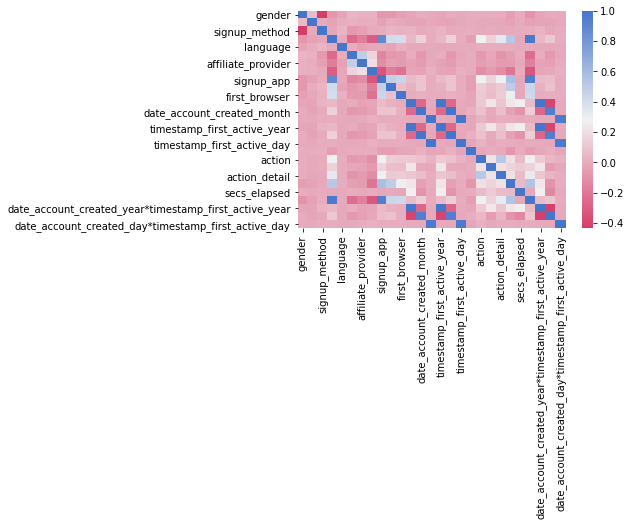

In [38]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = train.corr() 
sns.heatmap(correlations, cmap=cmap)
plt.show()

In [39]:
sub = pd.DataFrame(np.column_stack((id_test,y_pred)), columns=['id','country'])
sub = sub.drop_duplicates()
sub.to_csv('./submit.csv',index=False)